In [1]:
import pymysql.cursors
import pandas as pd

conn = pymysql.connect(host='172.20.95.116', user='emily0', password='1234',
                       db='leisure', charset='utf8')

In [ ]:
cur = conn.cursor(pymysql.cursors.DictCursor)
query = """
select 
    e.year,
    e.서울특별시 AS employment_서울특별시,
    e.부산광역시 AS employment_부산광역시,
    e.대구광역시 AS employment_대구광역시,
    e.인천광역시 AS employment_인천광역시,
    e.광주광역시 AS employment_광주광역시,
    e.대전광역시 AS employment_대전광역시,
    e.울산광역시 AS employment_울산광역시,
    t.서울특별시 AS revenue_서울특별시,
    t.부산광역시 AS revenue_부산광역시,
    t.대구광역시 AS revenue_대구광역시,
    t.인천광역시 AS revenue_인천광역시,
    t.광주광역시 AS revenue_광주광역시,
    t.대전광역시 AS revenue_대전광역시,
    t.울산광역시 AS revenue_울산광역시
from  employment_data e
	inner join ticket_revenue t on e.year = t.year
"""
cur.execute(query)
rows = cur.fetchall() 
result_df = pd.DataFrame(rows) 
print(result_df)
cur.close()
conn.close()

   year  employment_서울특별시  employment_부산광역시  employment_대구광역시  \
0  2015              60.0              56.3              59.4   
1  2016              60.0              56.2              59.3   
2  2017              60.2              56.3              58.8   
3  2018              59.6              55.7              58.2   
4  2019              60.0              56.6              57.9   
5  2020              59.3              55.6              56.6   
6  2021              59.2              56.2              58.2   
7  2022              60.4              57.1              59.1   
8  2023              61.1              57.7              59.8   
9  2024              61.7              57.8              58.0   

   employment_인천광역시  employment_광주광역시  employment_대전광역시  employment_울산광역시  \
0              61.1              58.5              59.6              59.0   
1              61.8              58.1              59.7              59.0   
2              61.7              59.0              58

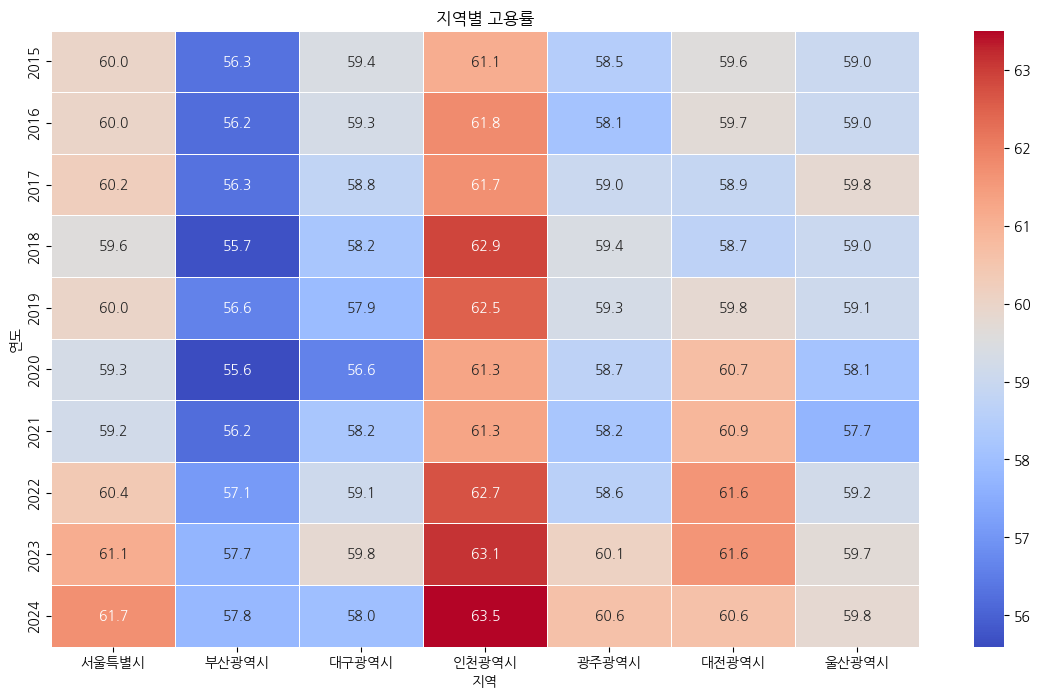

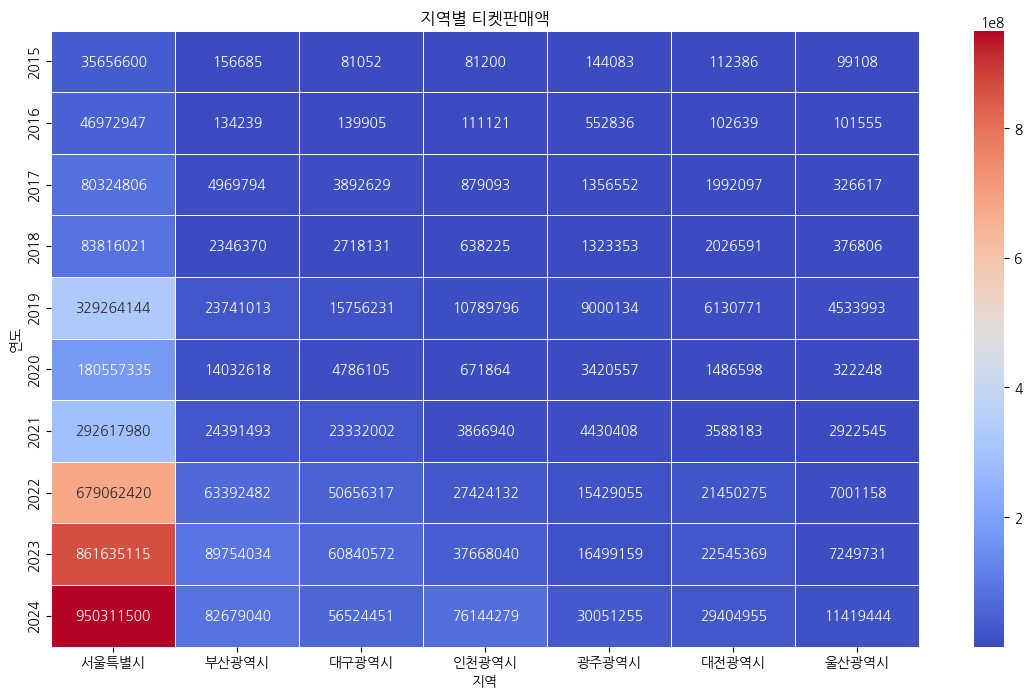

In [32]:
import koreanize_matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# 필요한 열만 선택
employment_columns = ['year', 'employment_서울특별시', 'employment_부산광역시', 
                      'employment_대구광역시', 'employment_인천광역시', 
                      'employment_광주광역시', 'employment_대전광역시', 
                      'employment_울산광역시']

revenue_columns = ['revenue_서울특별시', 'revenue_부산광역시', 
                   'revenue_대구광역시', 'revenue_인천광역시', 
                   'revenue_광주광역시', 'revenue_대전광역시', 
                   'revenue_울산광역시']

# 고용률과 수입 데이터를 결합
heatmap_data = result_df[employment_columns + revenue_columns]

# 쉼표 제거 및 int 변환
for col in revenue_columns:
    heatmap_data[col] = heatmap_data[col].str.replace(',', '').astype(int)

# 'year'를 인덱스로 설정
heatmap_data.set_index('year', inplace=True)

# 고용률 히트맵 생성
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data[employment_columns[1:]], annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5)
plt.title('지역별 고용률')
plt.xlabel('지역')
plt.ylabel('연도')

# x축 레이블을 각 컬럼의 중앙에 배치
plt.xticks(ticks=[i + 0.5 for i in range(len(employment_columns[1:]))], 
           labels=[col.replace('employment_', '') for col in employment_columns[1:]], 
           rotation=0, ha='center')
plt.show()

# 수입 히트맵 생성
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data[revenue_columns], annot=True, fmt="d", cmap='coolwarm', linewidths=.5)
plt.title('지역별 티켓판매액')
plt.xlabel('지역')
plt.ylabel('연도')

# x축 레이블을 각 컬럼의 중앙에 배치
plt.xticks(ticks=[i + 0.5 for i in range(len(revenue_columns))], 
           labels=[col.replace('revenue_', '') for col in revenue_columns], 
           rotation=0, ha='center')
plt.show()
